In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
bike = pd.read_csv('C:\\Users\HP\Desktop\Ebooks\Work\IT Projects\Data Science\Python\Linear Regression - Bikeshare\Bikeshare.csv')

In [3]:
bike.head(6)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


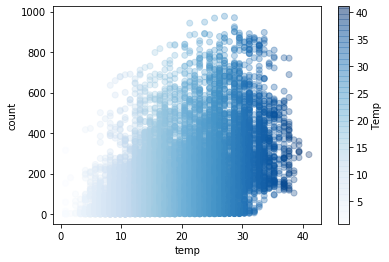

In [4]:
plt.scatter(bike['temp'], bike['count'], c=bike['temp'], cmap='Blues', alpha=0.3)
cbar=plt.colorbar(label='Temp')
plt.xlabel('temp') 
plt.ylabel('count');

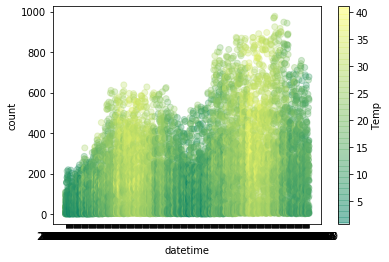

In [5]:
x=bike['datetime'].copy()
for i in range(10886):
    x[i]=x[i][0:10]

plt.scatter(x, bike['count'], c=bike['temp'],cmap='summer', alpha=0.3)
cbar=plt.colorbar(label='Temp')
plt.xlabel('datetime') 
plt.ylabel('count');

In [7]:
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [8]:
x=bike['datetime'].copy()
for i in range(10886):
    x[i]=x[i][11:13]
bike['hour'] = x

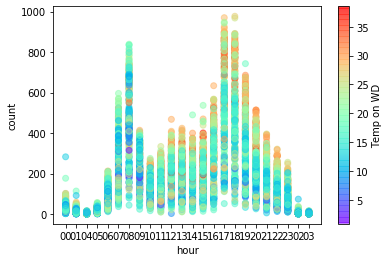

In [9]:
plt.scatter(bike[bike['workingday']==1]['hour'],bike[bike['workingday']==1]['count'], c=bike[bike['workingday']==1]['temp'], cmap= 'rainbow',alpha=0.5)
cbar=plt.colorbar(label='Temp on WD')
plt.xlabel('hour') 
plt.ylabel('count');

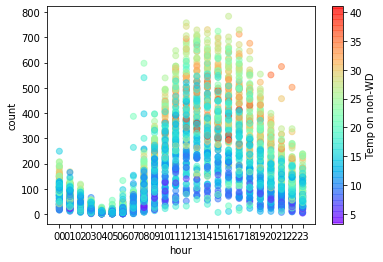

In [10]:
plt.scatter(bike[bike['workingday']==0]['hour'],bike[bike['workingday']==0]['count'], c=bike[bike['workingday']==0]['temp'], cmap= 'rainbow',alpha=0.5)
cbar=plt.colorbar(label='Temp on non-WD')
plt.xlabel('hour') 
plt.ylabel('count');

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
temp_model = LinearRegression(fit_intercept=False)

In [37]:
bike['hour'] = bike['hour'].astype(dtype='int')
a=('season','holiday','workingday','weather','temp','humidity','windspeed','hour')
X = bike.loc[:,a]
#Xt=bike['temp']
y=bike['count']

xtrain,xtest,ytrain, ytest = train_test_split(X,y,random_state=1)
temp_model.fit(xtrain,ytrain)
temp_model.normalize
xtest.index=range(2722)
ypred= temp_model.predict(xtest)

In [43]:
temp_model.coef_

array([ 23.20943931, -16.14629678,   2.63065421,  -1.76831686,
         7.40503052,  -1.92296464,   0.5954437 ,   8.11393506])

In [45]:
temp_model.intercept_

0.0

In [46]:
np.random.seed(1)
err = np.std([temp_model.fit(xtrain,ytrain).coef_ for i in range(1000)], 0)

In [47]:
params = pd.Series(temp_model.coef_, index= X.columns)
print(pd.DataFrame({'effect':params.round(0) , 'error': err.round(0)}))

            effect  error
season        23.0    0.0
holiday      -16.0    0.0
workingday     3.0    0.0
weather       -2.0    0.0
temp           7.0    0.0
humidity      -2.0    0.0
windspeed      1.0    0.0
hour           8.0    0.0
